In [1]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from catboost.datasets import titanic

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
installs = pd.read_csv('TP 1er Cuatrimestre 2019/installsConFeatures.csv', low_memory=False, parse_dates = ['created'], index_col=['created'])
installs = installs.sort_index()
installs.head()

,Unnamed: 0,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,top10apps,top50marcas,top10marcas,top10marcasSinNan,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng
created,,,,,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,94738,70,1,4432995619177048534,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
2019-04-18 00:00:01.851,94737,70,1,5904733559638204455,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
2019-04-18 00:00:05.152,111877,65,1,896373747754111825,False,True,6287817205707153877,6,102,2,...,3,6,6,6,2,2,1,0,0,8
2019-04-18 00:00:05.589,76146,27,0,3399210824535017892,False,False,6287817205707153877,0,190,2,...,0,0,0,0,21,14,6,1,1,2
2019-04-18 00:00:06.795,435184,339,0,1541425881979513687,False,False,6287817205707153877,0,190,2,...,0,0,0,0,68,46,10,1,1,6


In [3]:
"""marcas = list(installs['device_brand'].drop_duplicates())

def categorizarDeviceBrand(x):
    return marcas.index(x) if (x != -1) else x

installs['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)"""

"marcas = list(installs['device_brand'].drop_duplicates())\n\ndef categorizarDeviceBrand(x):\n    return marcas.index(x) if (x != -1) else x\n\ninstalls['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)"

In [4]:
"""device_model = list(installs['device_model'].drop_duplicates())

def categorizarDeviceModel(x):
    return device_model.index(x) if (x != -1) else x

installs['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)"""

"device_model = list(installs['device_model'].drop_duplicates())\n\ndef categorizarDeviceModel(x):\n    return device_model.index(x) if (x != -1) else x\n\ninstalls['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)"

In [5]:
"""device_language = list(installs['device_language'].drop_duplicates())

def categorizarDeviceLanguage(x):
    return device_language.index(x) if (x != -1) else x

installs['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)
installs.describe()"""

"device_language = list(installs['device_language'].drop_duplicates())\n\ndef categorizarDeviceLanguage(x):\n    return device_language.index(x) if (x != -1) else x\n\ninstalls['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)\ninstalls.describe()"

In [6]:
info1 = installs['2019-04-21':'2019-04-23'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info1['created'] = info1['created'] - pd.Timestamp('2019-04-21 00:00:00')
info1['created'] = info1['created'].transform(lambda x: x.total_seconds())
info1 = info1.reset_index()
info1 = info1.merge(installs['2019-04-18':'2019-04-20'].reset_index(),on="ref_hash", how="right")
info1 = info1.rename(columns={'created_x':'label','created_y':'created'})

label1 = info1['label'].to_frame()
train1 = info1.drop('label', axis=1)

In [7]:
info2 = installs['2019-04-22':'2019-04-24'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info2['created'] = info2['created'] - pd.Timestamp('2019-04-22 00:00:00')
info2['created'] = info2['created'].transform(lambda x: x.total_seconds())
info2 = info2.reset_index()
info2 = info2.merge(installs['2019-04-19':'2019-04-21'].reset_index(),on="ref_hash", how="right")
info2 = info2.rename(columns={'created_x':'label','created_y':'created'})

label2 = info2['label'].to_frame()
train2 = info2.drop('label', axis=1)

In [8]:
info3 = installs['2019-04-23':'2019-04-25'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info3['created'] = info3['created'] - pd.Timestamp('2019-04-23 00:00:00')
info3['created'] = info3['created'].transform(lambda x: x.total_seconds())
info3 = info3.reset_index()
info3 = info3.merge(installs['2019-04-20':'2019-04-22'].reset_index(),on="ref_hash", how="right")
info3 = info3.rename(columns={'created_x':'label','created_y':'created'})

label3 = info3['label'].to_frame()
train3 = info3.drop('label', axis=1)

In [9]:
info4 = installs['2019-04-24':'2019-04-26'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info4['created'] = info4['created'] - pd.Timestamp('2019-04-24 00:00:00')
info4['created'] = info4['created'].transform(lambda x: x.total_seconds())
info4 = info4.reset_index()
info4 = info4.merge(installs['2019-04-21':'2019-04-23'].reset_index(),on="ref_hash", how="right")
info4 = info4.rename(columns={'created_x':'label','created_y':'created'})

label4 = info4['label'].to_frame()
train4 = info4.drop('label', axis=1)


In [10]:
train1 = train1.dropna()
train2 = train2.dropna()
train3 = train3.dropna()
train4 = train4.dropna()
label1 = label1.fillna(3*24*60*60)
label2 = label2.fillna(3*24*60*60)
label3 = label3.fillna(3*24*60*60)
label4 = label4.fillna(3*24*60*60)

In [11]:
train1.drop(['created'],axis =1, inplace = True )
train2.drop(['created'],axis =1, inplace = True )
train3.drop(['created'],axis =1, inplace = True )
train4.drop(['created'],axis =1, inplace = True )

In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160861 entries, 0 to 160860
Data columns (total 30 columns):
ref_hash              160861 non-null int64
Unnamed: 0            160861 non-null int64
application_id        160861 non-null int64
ref_type              160861 non-null int64
attributed            160861 non-null bool
implicit              160861 non-null bool
device_countrycode    160861 non-null int64
device_brand          160861 non-null int64
device_model          160861 non-null int64
session_user_agent    160861 non-null int64
user_agent            160861 non-null int64
kind                  160861 non-null int64
wifi                  160861 non-null bool
ip_address            160861 non-null int64
device_language       160861 non-null int64
TopApp/Otro           160861 non-null int64
dia                   160861 non-null int64
hora                  160861 non-null int64
minuto                160861 non-null int64
diaDeLaSemana         160861 non-null int64
top10apps   

# Analisis

## Entreno

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
regression_model.fit(train1,label1)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

22048.91414393485

### Veo con que min_sample_leaf conviene

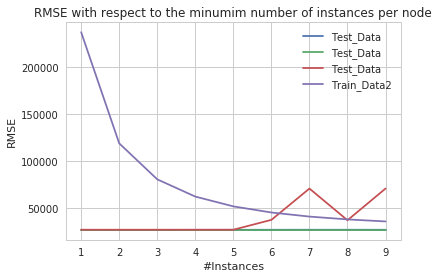

In [15]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test2 = []
RMSE_test3 = []
RMSE_test4 = []
for i in range(1,10):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train1,label1)
    #Predict query instances
    predicted_train = regression_model.predict(train1)
    predicted_test2 = regression_model.predict(train2)
    predicted_test3 = regression_model.predict(train3)
    predicted_test4 = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label1['label']-predicted_train[0])**2)/len(label1['label']))))
    RMSE_test2.append(np.sqrt(np.sum(((label2['label']-predicted_test2[0])**2)/len(label2['label']))))
    RMSE_test3.append(np.sqrt(np.sum(((label3['label']-predicted_test3[0])**2)/len(label3['label']))))
    RMSE_test4.append(np.sqrt(np.sum(((label4['label']-predicted_test4[0])**2)/len(label4['label']))))
   
ax0.plot(range(1,10),RMSE_test2,label='Test_Data')
ax0.plot(range(1,10),RMSE_test3,label='Test_Data')
ax0.plot(range(1,10),RMSE_test4,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data2')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [16]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
'''fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,50):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train1,label1)
    #Predict query instances
    predicted_train = regression_model.predict(train1)
    predicted_test = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label1['label']-predicted_train[0])**2)/len(label1['label']))))
    RMSE_test.append(np.sqrt(np.sum(((label4['label']-predicted_test[0])**2)/len(label4['label']))))'''

'fig = plt.figure()\nax0 = fig.add_subplot(111) \nRMSE_train = []\nRMSE_test = []\nfor i in range(1,50):\n    #Paramterize the model and let i be the number of minimum instances per leaf node\n    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   \n    #Train the model\n    regression_model.fit(train1,label1)\n    #Predict query instances\n    predicted_train = regression_model.predict(train1)\n    predicted_test = regression_model.predict(train4)\n    #Calculate and append the RMSEs\n    RMSE_train.append(np.sqrt(np.sum(((label1[\'label\']-predicted_train[0])**2)/len(label1[\'label\']))))\n    RMSE_test.append(np.sqrt(np.sum(((label4[\'label\']-predicted_test[0])**2)/len(label4[\'label\']))))'

In [17]:
'''ax0.plot(range(1,50),RMSE_test,label='Test_Data')
ax0.plot(range(1,50),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()'''

"ax0.plot(range(1,50),RMSE_test,label='Test_Data')\nax0.plot(range(1,50),RMSE_train,label='Train_Data')\nax0.legend()\nax0.set_title('RMSE with respect to the minumim number of instances per node')\nax0.set_xlabel('#Instances')\nax0.set_ylabel('RMSE')\nplt.show()"

### Elijo min_sample_leaf de 9, parece que en todos da un resultado relativamente bueno.

In [18]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=9) 
regression_model.fit(train1,label1)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

24303.508081398682

### Hago otras pruebas

In [19]:
predicted = regression_model.predict(train2)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label2['label']-predicted[0])**2)/len(label2)))
RMSE

28352.168738846027

In [20]:
predicted = regression_model.predict(train3)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label3['label']-predicted[0])**2)/len(label3)))
RMSE

29991.823327804756

In [21]:
predicted = regression_model.predict(train4)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label4['label']-predicted[0])**2)/len(label4)))
RMSE

30080.584905735985

## Predigo

In [22]:
ultimo = installs['2019-04-24':'2019-04-26'].reset_index()

In [23]:
ultimo = ultimo.dropna()
ultimo.drop(['created'],axis =1, inplace = True )

In [24]:
predicted = regression_model.predict(ultimo)

In [25]:
preds = pd.DataFrame(predicted)
preds

,0
0,"235,186.49"
1,"259,200.00"
2,"259,200.00"
3,"259,200.00"
4,"259,200.00"
5,"235,186.49"
6,"235,186.49"
7,"235,186.49"
8,"235,186.49"
9,"259,200.00"


In [26]:
preds.max()

0             259,200.00
dtype: float64

### Verifico que el maximo sea 3 * 24 * 60 * 60

In [27]:
preds[0] = preds[0].transform(lambda x: min(x, 3*24*60*60))

In [28]:
preds.max()

0             259,200.00
dtype: float64

# Que pasa si usamos todos los datos a la vez?

In [29]:
train = train1.append(train2)
train = train.append(train3)
#train = train.append(train4)
train.head()

,ref_hash,Unnamed: 0,application_id,ref_type,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,top10apps,top50marcas,top10marcas,top10marcasSinNan,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng
0,2493454867357963,432802,158,1,False,False,6287817205707153877,0,120,0,...,0,0,0,0,0,0,0,1,1,0
1,3589607969461633,49587,77,1,False,False,6287817205707153877,0,70,0,...,0,0,0,0,0,0,0,1,1,0
2,3589607969461633,426139,302,1,False,False,6287817205707153877,6,70,2,...,0,6,6,6,2,2,1,1,1,8
3,3861795021724487,438549,339,0,False,False,6287817205707153877,0,190,2,...,0,0,0,0,68,46,10,1,1,3
4,6455321535851721,470596,94,1,False,False,6287817205707153877,0,74,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
label = label1.append(label2)
label = label.append(label3)
#label = label.append(label4)
label.head()

,label
0,"19,452.72"
1,"108,671.33"
2,"108,671.33"
3,"252,890.11"
4,"217,290.61"


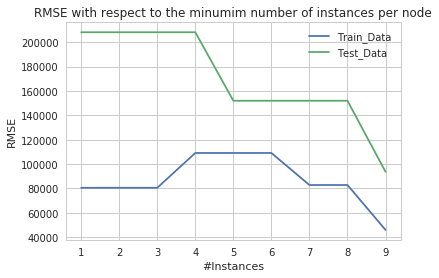

In [31]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train,label)
    #Predict query instances
    predicted_train = regression_model.predict(train)
    predicted_test = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label['label']-predicted_train[0])**2)/len(label['label']))))
    RMSE_test.append(np.sqrt(np.sum(((label4['label']-predicted_test[0])**2)/len(label4['label']))))
   
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

### Elijo min_sample_leaf de 10?, parece que en todos da un resultado relativamente bueno.

In [32]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=10) 
regression_model.fit(train,label)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

23908.20650684778

### Hago otras pruebas

In [33]:
predicted = regression_model.predict(train2)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label2['label']-predicted[0])**2)/len(label2)))
RMSE

21987.094271840924

In [34]:
predicted = regression_model.predict(train3)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label3['label']-predicted[0])**2)/len(label3)))
RMSE

23150.968563354636

In [35]:
predicted = regression_model.predict(train4)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label4['label']-predicted[0])**2)/len(label4)))
RMSE

28621.256461955596

## Es otra opcion

## Predigo

In [36]:
ultimo2 = installs['2019-04-24':'2019-04-26'].reset_index()

In [37]:
ultimo2 = ultimo2.dropna()
ultimo2.drop(['created'],axis =1, inplace = True )

In [38]:
predicted = regression_model.predict(ultimo2)

In [39]:
preds2 = pd.DataFrame(predicted)
preds2

,0
0,"255,062.77"
1,"259,200.00"
2,"259,200.00"
3,"259,200.00"
4,"259,200.00"
5,"259,200.00"
6,"259,200.00"
7,"255,062.77"
8,"259,200.00"
9,"259,200.00"


In [40]:
preds2.max()

0             259,200.00
dtype: float64

### Verifico que el maximo sea 3 * 24 * 60 * 60

In [41]:
preds2[0] = preds2[0].transform(lambda x: min(x, 3*24*60*60))

In [42]:
preds2.max()

0             259,200.00
dtype: float64

# Targets

# 1er posible target

In [43]:
target = pd.read_csv('TP 1er Cuatrimestre 2019/target_competencia_ids.csv', low_memory=False)


In [46]:
ultimo['label']=preds
ultimo['sc'] = ultimo['ref_hash'].transform(lambda x: str(x)+'_sc')
mergeados = ultimo.merge(target, left_on = 'sc',right_on='ref_hash', how='inner')

In [50]:
mergeados = mergeados[['ref_hash_y','label']]
mergeados

,ref_hash_y,label
0,5121090773348427986_sc,"259,200.00"
1,5121090773348427986_sc,"259,200.00"
2,4208240277030926074_sc,"259,200.00"
3,794811155765028203_sc,"259,200.00"
4,348320512068316325_sc,"235,186.49"
5,348320512068316325_sc,"235,186.49"
6,6147745653734062078_sc,"235,186.49"
7,6147745653734062078_sc,"235,186.49"
8,6147745653734062078_sc,"259,200.00"
9,6553984031358099898_sc,"194,167.49"


In [51]:
mergeados = mergeados.fillna(3*24*60*60)

# 2do posible target

In [52]:
ultimo2['label']=preds
ultimo2['sc'] = ultimo2['ref_hash'].transform(lambda x: str(x)+'_sc')
mergeados2 = ultimo2.merge(target, left_on = 'sc',right_on='ref_hash', how='inner')

NameError: name 'ultimo2' is not defined

In [50]:
mergeados2 = mergeados2[['ref_hash_y','label']]
mergeados2

,ref_hash_y,label
0,5121090773348427986_sc,"259,200.00"
1,5121090773348427986_sc,"259,200.00"
2,4208240277030926074_sc,"259,200.00"
3,794811155765028203_sc,"259,200.00"
4,348320512068316325_sc,"235,186.49"
5,348320512068316325_sc,"235,186.49"
6,6147745653734062078_sc,"235,186.49"
7,6147745653734062078_sc,"235,186.49"
8,6147745653734062078_sc,"259,200.00"
9,6553984031358099898_sc,"194,167.49"


In [51]:
mergeados2 = mergeados2.fillna(3*24*60*60)